In [138]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

# Part 1: US Census Data

## Load Data Into a Data Frame and Remove Duplicate Rows

In [221]:
# Read CSVs into DataFrames and concatenate them.
us_census = pd.concat([pd.read_csv(csv_file, index_col=0) for csv_file in glob("states[0-9].csv")])
us_census = us_census.sort_values("State")
us_census = us_census.drop_duplicates("State")
us_census = us_census.reset_index(drop=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


## dtypes of Columns

In [222]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

## Converting Income to Numerical Data

In [223]:
income_col = us_census["Income"]
income_col = income_col.str.extract("([0-9]+\.[0-9]+)")
income_col.head()

,0
0,43296.35860306644
1,70354.74390243902
2,54207.82095490716
3,41935.63396778917
4,67264.78230266465


In [224]:
income_col.isna().any()

0    False
dtype: bool

In [225]:
us_census["Income"] = income_col
us_census = us_census.astype({ "Income": np.float64 })
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [226]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object

## Converting Male and Female Population to Numerical Data

In [227]:
pop_column = us_census["GenderPop"]
pop_column = pop_column.str.extractall("([0-9]+)")
pop_column = pop_column.unstack()
pop_column.columns = ["MalePop", "FemalePop"]
pop_column.head()

,MalePop,FemalePop
0,2341093,2489527
1,384160,349215
2,3299088,3342840
3,1451913,1506295
4,19087135,19334329


In [228]:
del us_census["GenderPop"]

In [229]:
us_census["MalePop"] = pop_column["MalePop"]
us_census["FemalePop"] = pop_column["FemalePop"]

### There are no missing values in total population and male population.

In [230]:
us_census["TotalPop"].isna().any()

False

In [231]:
us_census["MalePop"].isna().any()

False

### There are missing values in female population.

In [232]:
us_census["FemalePop"].isna().any()

True

### Let's convert total and male population to numerical data.

In [233]:
us_census = us_census.astype({ "TotalPop": np.int64, "MalePop": np.int64 })
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
MalePop        int64
FemalePop     object
dtype: object

### Compute and fill missing values in female population.

In [234]:
us_census = us_census.fillna({ "FemalePop": us_census["TotalPop"] - us_census["MalePop"] })

In [235]:
us_census["FemalePop"].isna().any()

False

### Now, we can convert female population to numerical data.

In [236]:
us_census = us_census.astype({ "FemalePop": np.int64 })
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
MalePop        int64
FemalePop      int64
dtype: object

## Scatter Plot Between Female Population and Income

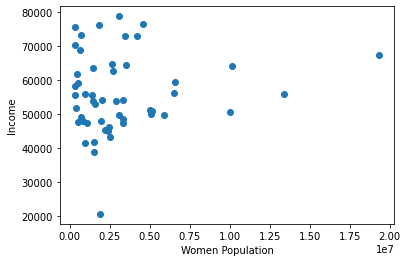

In [237]:
plt.scatter(us_census["FemalePop"], us_census["Income"])
plt.xlabel("Women Population")
plt.ylabel("Income")
plt.show()

## Percentages of Different Races in Population

In [238]:
us_census.iloc[:, 2:8].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%
1,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%
2,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%
3,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%
4,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%


## Convert Percentages of Races to Numerical Data

In [239]:
us_census.iloc[:, 2:8] = us_census.iloc[:, 2:8].replace("%", "", regex=True).astype(np.float64)
us_census.iloc[:, 2:8].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410


## Histogram for Hispanic Race

Text(0, 0.5, 'Frequency')

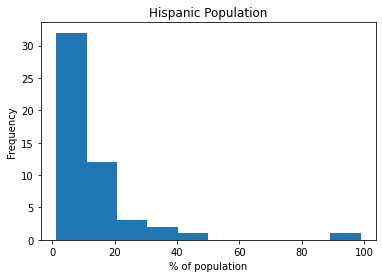

In [240]:
plt.hist(us_census["Hispanic"])
plt.title("Hispanic Population")
plt.xlabel("% of population")
plt.ylabel("Frequency")

## Histogram for White Race

Text(0, 0.5, 'Frequency')

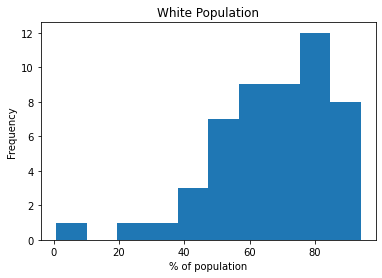

In [241]:
plt.hist(us_census["White"])
plt.title("White Population")
plt.xlabel("% of population")
plt.ylabel("Frequency")

## Histogram for Black Race

Text(0, 0.5, 'Frequency')

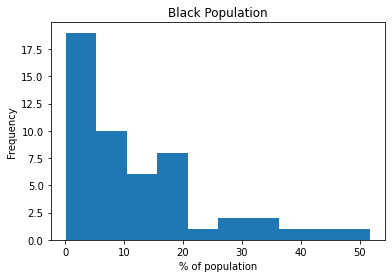

In [242]:
plt.hist(us_census["Black"])
plt.title("Black Population")
plt.xlabel("% of population")
plt.ylabel("Frequency")

## Histogram for Native Race

Text(0, 0.5, 'Frequency')

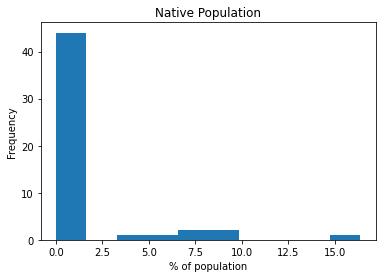

In [243]:
plt.hist(us_census["Native"])
plt.title("Native Population")
plt.xlabel("% of population")
plt.ylabel("Frequency")

## Histogram for Asian Race

Text(0, 0.5, 'Frequency')

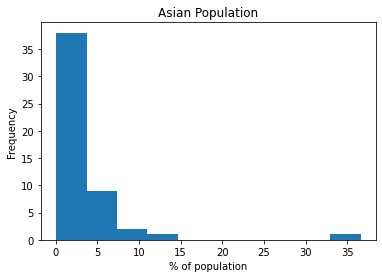

In [244]:
plt.hist(us_census["Asian"])
plt.title("Asian Population")
plt.xlabel("% of population")
plt.ylabel("Frequency")

## Histogram for Pacific Race

Text(0, 0.5, 'Frequency')

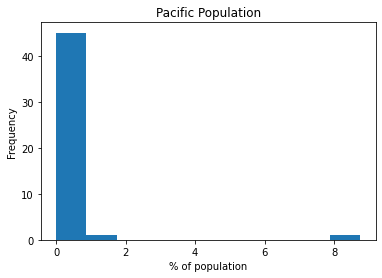

In [245]:
plt.hist(us_census["Pacific"])
plt.title("Pacific Population")
plt.xlabel("% of population")
plt.ylabel("Frequency")

# Part 2: Petal Power Inventory

## First 10 Rows of Inventory Data

In [184]:
inventory = pd.read_csv("inventory.csv")
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


## Staten Island Inventory

In [169]:
staten_island = inventory.iloc[0:10]

## Products Available at Staten Island Location

In [170]:
product_request = staten_island["product_description"]
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

## Seeds Available at Brooklyn Location

In [183]:
seed_request = inventory[(inventory["location"] == "Brooklyn") & (inventory["product_type"] == "seeds")]["product_description"]
seed_request

10         daisy
11    calla lily
12        tomato
Name: product_description, dtype: object

## In Stock Column

In [186]:
inventory["in_stock"] = inventory["quantity"] > 0
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


## Total Value Column

In [189]:
inventory["total_value"] = inventory["quantity"] * inventory["price"]
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


## Complete Description Column

In [198]:
combine_lambda = lambda row: '{} - {}'.format(row["product_type"], row["product_description"])
inventory["full_description"] = inventory.apply(combine_lambda, axis=1)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
